#1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

#파이토치 시작하기

파이토치 시작하기

In [1]:
import torch 
import numpy as np

- tensor 개념 파악 (array of numerical values(vector, matrix..))\
: numpy의 array와 비슷하다고 보면 됨. pytorch의 array는 tensor. (3차원 이상의 행렬)
- 4x3 행렬 두개 만들고 행으로 병합, 열로 병합


In [2]:
#랜덤생성 
X=torch.rand(4, 3)
Y=torch.rand(4, 3)

#torch.empty() -> 빈 행렬

###행으로 병합 코드
output1 = torch.cat([X,Y], dim=0) 

###열로 병합 코드
output2 = torch.cat([X,Y], dim=1) 

In [3]:
X.shape

torch.Size([4, 3])

In [4]:
output1

tensor([[0.3569, 0.0220, 0.7567],
        [0.5537, 0.4715, 0.9705],
        [0.8653, 0.9012, 0.0557],
        [0.4681, 0.5682, 0.4875],
        [0.1202, 0.9097, 0.5202],
        [0.4493, 0.8446, 0.7481],
        [0.0568, 0.8855, 0.5900],
        [0.3267, 0.2170, 0.6797]])

In [5]:
output2

tensor([[0.3569, 0.0220, 0.7567, 0.1202, 0.9097, 0.5202],
        [0.5537, 0.4715, 0.9705, 0.4493, 0.8446, 0.7481],
        [0.8653, 0.9012, 0.0557, 0.0568, 0.8855, 0.5900],
        [0.4681, 0.5682, 0.4875, 0.3267, 0.2170, 0.6797]])

linear regression implementation from scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [ ]:
!pip install d2l

In [ ]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [102]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w))) #torch.normal(mean, std, *, generator=None, out=None) #size=(1,4)
    y = torch.matmul(X, w) + b #matmul: 두 tensor의 행렬곱
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [103]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([1.1718, 0.8859]) 
label: tensor([7.6760])


In [104]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
       batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)]) # 슬라이싱
       yield features[batch_indices], labels[batch_indices]

In [105]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels): # features, labels 출력
    print(X, '\n', y)
    break #하나만 print

tensor([[ 0.0257, -0.5518],
        [-1.9934, -1.1892],
        [ 0.6842, -0.3391],
        [-0.0377, -0.6744],
        [ 0.2691, -0.8068],
        [ 1.0710,  0.4590],
        [ 0.5348, -0.4394],
        [-0.6240,  0.9749],
        [ 0.7445,  2.2986],
        [-2.0758,  0.2347],
        [ 0.4572,  0.5209],
        [ 1.1878, -0.8343],
        [-0.2222, -1.3138],
        [ 0.2279, -0.2444],
        [-0.2191,  0.3332],
        [ 0.9782, -0.5466],
        [ 1.3010, -0.2867],
        [-0.1435, -1.5900],
        [-1.0652, -1.6169],
        [-1.4024,  1.2135]]) 
 tensor([[ 6.3987],
        [ 1.3128],
        [ 8.0526],
        [ 6.4010],
        [ 7.5157],
        [ 8.0169],
        [ 7.7712],
        [ 2.1652],
        [ 4.2609],
        [-1.0667],
        [ 6.0939],
        [10.3128],
        [ 6.7978],
        [ 6.5352],
        [ 4.3422],
        [ 9.2601],
        [ 9.8284],
        [ 7.4585],
        [ 4.7151],
        [-0.5040]])


In [106]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [107]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X, w) + b

In [108]:
def squared_loss(y_hat, y):  
    """Squared loss."""
    return (y_hat-y.reshape(y_hat.shape))**2 / 2  #y_hat shape로 변형해야 함 -> 다른가? 크기가?

In [109]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
      for param in params:
        param[:] = param - lr * param.grad/batch_size
        param.grad.zero_() #backpropagation을 하기전에 gradients를 zero로 만들어주고 시작을 해야합


In [110]:
lr = 0.001
num_epochs = 20
net = linreg
loss = squared_loss

w1_list =[]
w2_list =[]
loss1_list = []
loss2_list = []
b_list =[]

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) 
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w],lr,batch_size)  #update -> b는 제외
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

        w1_list.append(float(w[0]))
        w2_list.append(float(w[1]))
        loss1_list.append(float(train_l[0].mean()))
        loss2_list.append(float(train_l[1].mean()))
        b_list.append(b)


epoch 1, loss 20.171738
epoch 2, loss 19.276390
epoch 3, loss 18.538492
epoch 4, loss 17.930975
epoch 5, loss 17.431282
epoch 6, loss 17.019665
epoch 7, loss 16.680172
epoch 8, loss 16.400305
epoch 9, loss 16.170994
epoch 10, loss 15.981606
epoch 11, loss 15.825676
epoch 12, loss 15.697669
epoch 13, loss 15.591513
epoch 14, loss 15.504072
epoch 15, loss 15.432391
epoch 16, loss 15.373627
epoch 17, loss 15.324952
epoch 18, loss 15.284562
epoch 19, loss 15.251420
epoch 20, loss 15.224260


In [111]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.2349, -0.2012], grad_fn=<SubBackward0>)
error in estimating b: tensor([5.5000], grad_fn=<RsubBackward1>)


+cost graph 그리기 (x축 w, y축 loss)

In [ ]:
! python -m pip uninstall matplotlib
! pip install matplotlib==3.1.3

Text(0.5, 0, 'w')

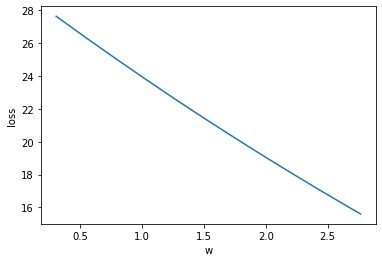

In [112]:
from matplotlib import pyplot as plt
import numpy as np


plt.plot(w1_list, loss1_list)
plt.ylabel('loss')
plt.xlabel('w')

Text(0.5, 0, 'w')

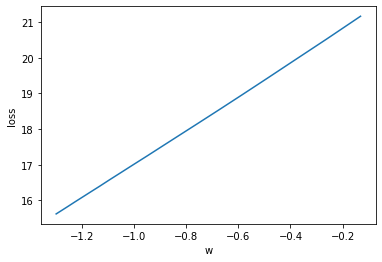

In [113]:
plt.plot(w2_list, loss2_list)
plt.ylabel('loss')
plt.xlabel('w')

concise implementation of linear regression 
- api 사용해보기

In [119]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l


true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [120]:
def load_array(data_arrays, batch_size, is_train=True): 
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [121]:
next(iter(data_iter))

[tensor([[ 2.4971e-01,  2.6952e-01],
         [-1.5170e+00,  1.2815e+00],
         [-1.6487e+00,  3.5478e-01],
         [ 2.4345e+00,  1.5910e+00],
         [-1.3839e+00,  6.2025e-01],
         [ 4.5208e-02, -1.7359e+00],
         [-1.8254e-01, -1.8421e-01],
         [-1.5365e+00,  1.0491e+00],
         [ 5.5967e-01, -8.4760e-01],
         [ 1.7188e-01,  1.5694e+00],
         [ 1.1986e+00, -1.5662e+00],
         [-1.6304e+00,  9.0895e-01],
         [ 4.8640e-01, -1.3904e+00],
         [ 5.1116e-01, -9.0784e-01],
         [-1.9981e-01, -4.5835e-01],
         [-2.2143e+00,  7.0452e-01],
         [-5.8015e-01, -1.0240e+00],
         [-1.0353e+00, -1.5497e-01],
         [ 2.2138e+00, -1.9345e+00],
         [-9.3402e-01,  7.6792e-04]]), tensor([[ 5.8276],
         [-0.9658],
         [ 0.0372],
         [10.4125],
         [ 0.4111],
         [ 8.2434],
         [ 5.2529],
         [-0.6765],
         [ 8.4581],
         [ 3.6642],
         [11.4556],
         [-0.7570],
         [ 9.0213],

In [122]:
from torch import nn

net = nn.Sequential(
    nn.Linear(2,1)
)

In [123]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [124]:
loss = torch.nn.MSELoss(size_average=False)

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [125]:
trainer = torch.optim.SGD(net.parameters(), lr=0.01)

In [126]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.208405
epoch 2, loss 0.200867
epoch 3, loss 0.200963


In [138]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([0.0002, 0.0011])
error in estimating b: tensor([3.9101e-05])
